# Predicting Movie Success..!

## 1. Introduction: 

Our client, a major film studio, aims to enhance their understanding of factors influencing movie success and improve prediction models for IMDB ratings. They want to leverage advanced data analysis techniques and machine learning to analyze movie characteristics and predict whether a movie will be a hit, average, or flop based on IMDB scores.

### 1.1 Data-Description

The dataset contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

## 2.	Data Exploration: 

Conduct comprehensive EDA using visualization techniques to understand feature distributions and relationships with IMDB scores.

### 2.1 Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- Readings from the dataset

In [2]:
data = pd.read_csv('D:\Predicting-Movie-Success\Dataset\movie_metadata.csv')
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ravia\AppData\Local\Temp\ipykernel_21084\1926975972.py:1: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv('D:\Predicting-Movie-Success\Dataset\movie_metadata.csv')


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### 2.2 Categorizing the target varible
Here we are categorizing the target variable in such a way that IMDB score between 1 and 3 is FLOP , between 3 and 6 is AVG, between 6 and 10 is HIT.

And we are using binning in pandas to acheive this.

In [3]:
#Categorising the target varible 
bins = [ 1, 3, 6, 10]
labels = ['FLOP', 'AVG', 'HIT']
data['imdb_success'] = pd.cut(data['imdb_score'], bins=bins, labels=labels)

- ### Barplot of imbd_success column

C:\Users\ravia\AppData\Local\Temp\ipykernel_21084\359283474.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['imdb_success']).size().plot(kind="bar",fontsize=10)


Text(0.5, 1.0, 'Categorization of Movies')

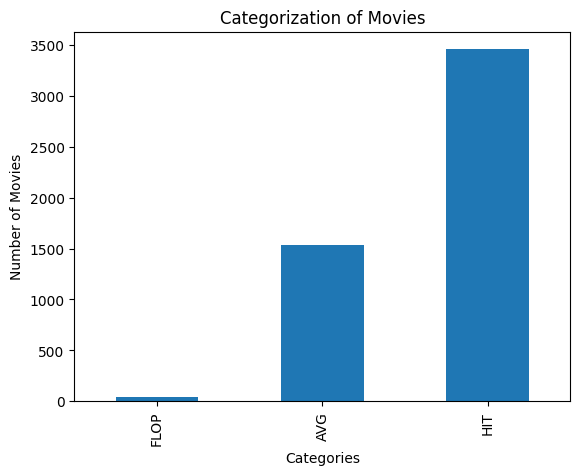

In [5]:
data.groupby(['imdb_success']).size().plot(kind="bar",fontsize=10)
plt.xlabel('Categories')
plt.ylabel('Number of Movies')
plt.title('Categorization of Movies')

In [6]:
#Checking the new column
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_success
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,HIT
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,HIT
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,HIT
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,HIT
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,HIT


### Our dataset contains 5043 samples(rows) and 28 variables(columns)

In [7]:
#Shape of the dataset
data.shape

(5043, 29)

### 2.3 Handling the Missing values